In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
url = 'HDFC_train.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 5:6].values
print(training_set)

[[111.        ]
 [111.95999908]
 [115.80000305]
 ...
 [424.5       ]
 [408.        ]
 [395.        ]]


In [14]:
dataset_train.head()

,Unnamed: 0,ID,Date,<HIGH>,<LOW>,<OPEN>,<CLOSE>,<VOL>,Adj Close,emv,emv_ema_14,acc_dist,acc_dist_ema21,obv,obv_ema21,pvt,pvt_ema21,atr,bol_bands_middle,bol_bands_upper,bol_bands_lower,google news,Wikki hits,Sector
0,37905,HDFC,2010-01-04 00:00:00,112.559998,110.699997,111.000000,111.349998,1079040,102.461502,-23976.571893,-2703.155459,-3.248707e+05,107326.043051,6355276860,6.355898e+09,2.860018e+08,2.866656e+08,27.551806,290.422343,371.346227,209.498459,2,NaN,Bank
1,37906,HDFC,2010-01-05 00:00:00,116.699997,111.800003,111.959999,115.190002,2112500,105.994957,607.715856,-2482.430705,8.105133e+05,139289.101038,6357389360,6.355965e+09,2.860747e+08,2.866387e+08,26.071685,282.077946,383.397157,180.758734,0,NaN,Bank
2,37907,HDFC,2010-01-06 00:00:00,122.000000,113.070000,115.800003,120.900002,5761450,111.249168,509.160882,-2282.991266,4.342058e+06,330324.043741,6363150810,6.356292e+09,2.863603e+08,2.866261e+08,24.928906,274.402806,390.047919,158.757692,1,NaN,Bank
3,37908,HDFC,2010-01-07 00:00:00,123.209999,119.000000,121.489998,119.470001,3174260,109.933304,473.486590,-2099.226075,-2.465516e+06,203240.411420,6359976550,6.356460e+09,2.863227e+08,2.866123e+08,23.547646,267.025053,391.368009,142.682097,16,NaN,Bank
4,37909,HDFC,2010-01-08 00:00:00,121.699997,118.639999,119.400002,119.330002,1220560,109.804497,-234.408953,-1974.904934,-6.701090e+05,163542.711549,6358755990,6.356564e+09,2.863213e+08,2.865991e+08,22.181803,259.991955,392.506670,127.477241,13,NaN,Bank


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 1995):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [19]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
1935/1935 [==============================] - 10s 5ms/step - loss: 0.0190
Epoch 2/5
1935/1935 [==============================] - 8s 4ms/step - loss: 0.0038
Epoch 3/5
1935/1935 [==============================] - 8s 4ms/step - loss: 0.0040
Epoch 4/5
1935/1935 [==============================] - 8s 4ms/step - loss: 0.0033
Epoch 5/5
1935/1935 [==============================] - 8s 4ms/step - loss: 0.0038


In [0]:
url = 'HDFC_test.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 5:6].values

In [0]:
dataset_total = pd.concat((dataset_train['<OPEN>'], dataset_test['<OPEN>']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 476):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

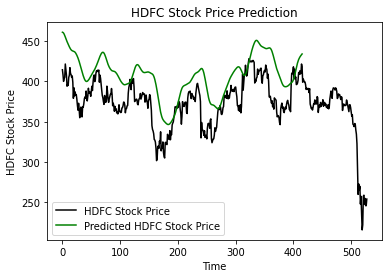

In [32]:
plt.plot(real_stock_price, color = 'black', label = 'HDFC Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted HDFC Stock Price')
plt.title('HDFC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFC Stock Price')
plt.legend()
plt.show()